In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

# train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
# test_df =  pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
train_df = pd.read_csv("train.csv")
test_df =  pd.read_csv("test.csv")


In [2]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot:>

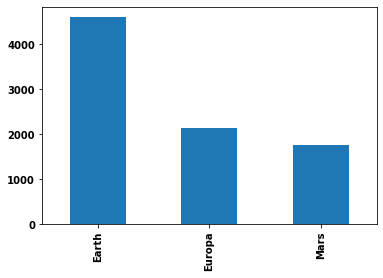

In [6]:
HomePlant = train_df['HomePlanet']
HomePlant.value_counts().plot(kind='bar')

In [10]:
cabin = train_df['Cabin']
cabin.value_counts() # pass this attributes

G/734/S     8
F/1411/P    7
G/1476/S    7
G/1368/P    7
C/21/P      7
           ..
A/53/S      1
D/240/P     1
C/257/S     1
F/818/S     1
G/450/P     1
Name: Cabin, Length: 6560, dtype: int64

In [13]:
train_df['CryoSleep'].value_counts()


False    5439
True     3037
Name: CryoSleep, dtype: int64

In [14]:
train_df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [16]:
print(train_df['Age'].value_counts())


24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
75.0      4
78.0      3
79.0      3
77.0      2
76.0      2
Name: Age, Length: 80, dtype: int64


In [17]:
print(train_df['VIP'].value_counts())


False    8291
True      199
Name: VIP, dtype: int64


In [18]:
print(train_df['RoomService'].value_counts())


0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
263.0        1
3103.0       1
1973.0       1
782.0        1
1174.0       1
Name: RoomService, Length: 1273, dtype: int64


In [20]:
print(train_df['FoodCourt'].value_counts())


0.0       5456
1.0        116
2.0         75
4.0         53
3.0         53
          ... 
1863.0       1
5412.0       1
661.0        1
2324.0       1
1174.0       1
Name: FoodCourt, Length: 1507, dtype: int64


In [21]:
print(train_df['ShoppingMall'].value_counts())


0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
2011.0       1
2778.0       1
239.0        1
2728.0       1
620.0        1
Name: ShoppingMall, Length: 1115, dtype: int64


In [22]:
print(train_df['Spa'].value_counts())


0.0       5324
1.0        146
2.0        105
3.0         53
5.0         53
          ... 
2810.0       1
5432.0       1
4864.0       1
2043.0       1
1159.0       1
Name: Spa, Length: 1327, dtype: int64


In [23]:
print(train_df['VRDeck'].value_counts())


0.0       5495
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
467.0        1
365.0        1
3173.0       1
3726.0       1
1174.0       1
Name: VRDeck, Length: 1306, dtype: int64
